<a href="https://colab.research.google.com/github/BronsonSchultz/487_A2/blob/main/asn2_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Blob detection

The `lentil.png` image is a greyscale image from constructed from the red light and near infrared light channels of a multispectral camera.  (Thanks to Dr. Kirstin Bett, Dept. of Plant Sciences, College of Agriculture for the image!).  The bright blobs you see in the middle section of the image are clusters of lentil plants called plots (each plot is a different genetic lineage).  These are areas of interest for plant breeders because they want to analyze the patches of plant, while ignoring the background soil.  To do that in an automated algorithm, we first have to find the plots!

Use one of the blob detection functions described at the end of the Topic 5 lecture slides to detect the blobs in the `lentil.png` image.  Obtain the best result you can from any one of the three available functions (in `skimage.feature`), namely `blob_log()`, `blob_dog()`, or `blob_doh()`.  Try the different functions and experiment with their parameters.   Don't worry too much about the correctness of the blobs at the very top and very bottom that are outside the area of the field trial.  These are not areas of interest.

For your best result, draw the blobs as circles on the output image and display the result.    The last slide of Topic 5 gives you an example of some code that does this.  Sample output is shown in the assignment description document.

Sample output is given in the assignment document but be aware that it is not necessarily representative of the quality of the blob detection that you might achieve because I did not spend more than 5 minutes tweaking the parameters.  You should be able to do at least as well, but possibly also better.  

_Hint: as usual, it is suggested that you convert the image to dtype `float` before processing._

_Hint: the lentil field image is pretty big, so you'll need to set the figure size to something larger.  For me `plt.figure(figsize=(20,7))` worked well, but I have an almost 4K display.  Smaller may work for you._




In [1]:
# clone of the images required for assignment 
!git clone https://github.com/BronsonSchultz/487_A2.git

Cloning into '487_A2'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [2]:
import skimage.io as io
import skimage.util as util
import skimage.feature as feat
import matplotlib.pyplot as plt
import math as math

# clean up the output of blobs by suppressing the math warnings
import warnings
warnings.filterwarnings('ignore')

# Write your code here.  It shouldn't take much.  Adapt the example on the last slide of the Topic 5 lecture notes.
lentils = io.imread('/content/487_A2/lentil.png')

In [3]:
def detect_blobs(I, max_sigma=30, num_sigma=10, threshold=0.1, method='log'):
  '''
  wrapper function to the three blob detection methods, chosen by the parameter method
  :param I: The input image
  :param max_sigma: the maximum sigma value to use in blob detection
  :param num_sigma: the number of iterations within the range of sigmas
  :param threshold: the value at which to consider pixels a blob, lower values allow darker pixels
  :param method: one of "log" "dog" or "doh", choosing the blob dectection algorithm to perform
  :return: the blobs from the chosen blob detection algorithm
  '''
  # convert image to float if it's not already
  if (I.dtype is not float):
    I = util.img_as_float(I)
  
  # based on the method argument, choose the method of detection
  if (method == 'doh'):
    blobs = feat.blob_doh(I, max_sigma=max_sigma, num_sigma=num_sigma, threshold=threshold)
  elif (method == 'dog'):
    blobs = feat.blob_dog(I, max_sigma=max_sigma, threshold=threshold)
  else:
    blobs = feat.blob_log(I, max_sigma=max_sigma, num_sigma=num_sigma, threshold=threshold, overlap=.4)
  
  # get the radii of the blobs
  blobs[:, 2] = blobs[:, 2] * math.sqrt(2)

  return blobs

In [4]:
def plot_image_blobs(blobs, I):
  '''
  plot circles around each found blob, as well as the orignal image
  for visualization
  
  :param blobs: the blobs array returned by detect_blobs
  :param: I: the original image used for the blob detection
  '''
  plt.figure(figsize=(20,7))
  plt.imshow(I)
  for row in blobs:
    circle = plt.Circle((row[1], row[0]), row[2], color='blue', linewidth=1, fill=False)
    plt.gca().add_patch(circle)
  plt.show()



Plotting the image and blobs for each method

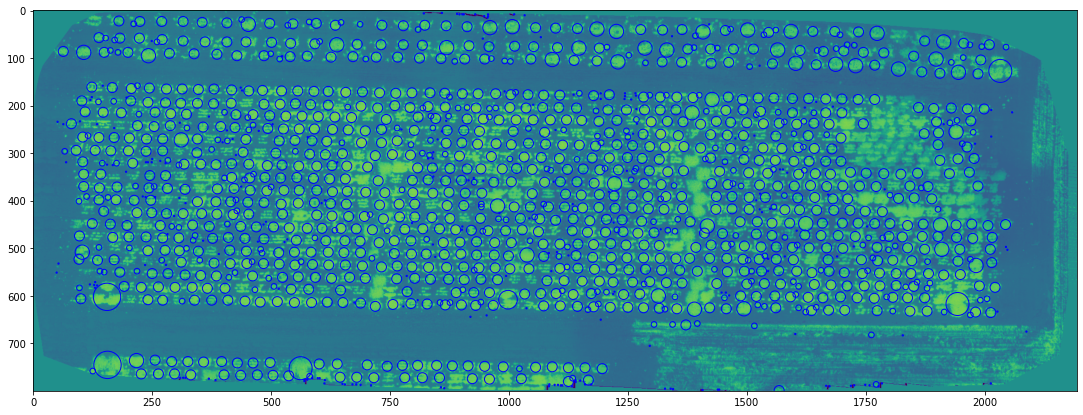

In [5]:
blobs_log = detect_blobs(lentils, max_sigma=30, num_sigma=10, threshold=0.133, method='log')
plot_image_blobs(blobs_log, lentils)

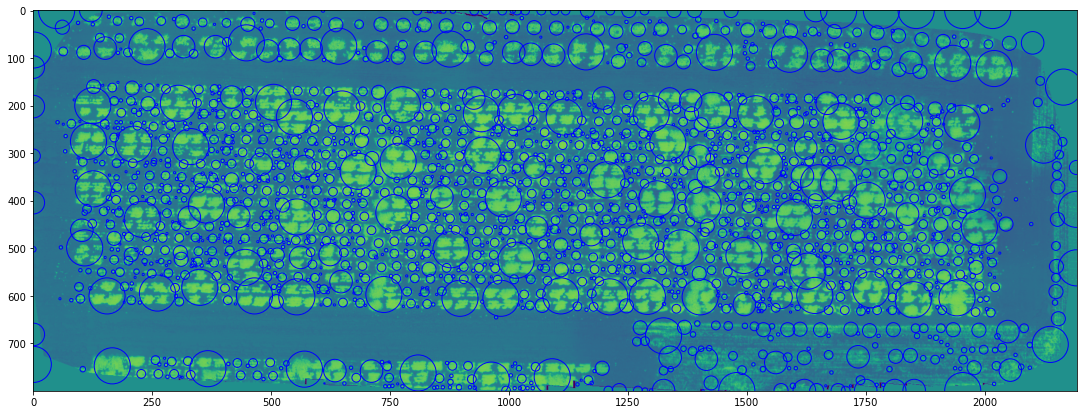

In [6]:
blobs_dog = detect_blobs(lentils, max_sigma=30, threshold=0.1, method='dog')
plot_image_blobs(blobs_dog, lentils)


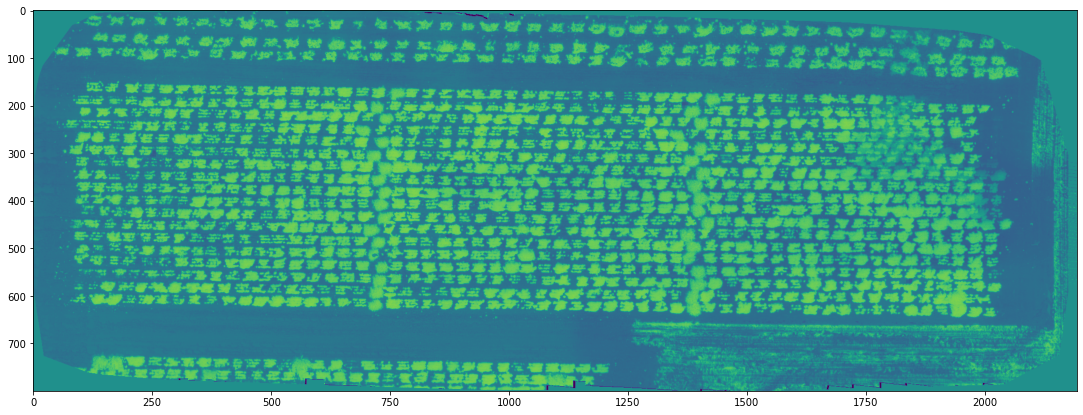

In [7]:
blobs_doh = detect_blobs(lentils, max_sigma=30, num_sigma=10, threshold=0.1, method='doh')
plot_image_blobs(blobs_doh, lentils)

# Step 2:  Thinking and Analysis

### Answer these questions, right here in this block.

1.  What properties of the image did you consider when selecting parameters for blob detection?  

	_Your answer:_
  > as the documentation says, keeping min_sigma low allows the algorithm to detect small blobs, so I kept that value at the defalut of 1 for blobs_log and doh. 
  With the default value of threshold=0.1 and overlap=0.5, I was getting many extra blobs that were splitting plots into pieces. I tried to mitigate this by increasing threshold to 0.133 and decreasing overlap to 0.4. These exact values were chosen through trial and error. Decreasing overlap means less percentage of two blobs need to overlap in order for them to merge. A higher threshold value means the algorithm will only detect blobs with a higher intensity.


2.  What kinds of errors (in terms of detecting the plots) did you observe in the detected blobs?  

	_Your answer:_
  > blob_log seems to perform the best, followed by blob_dog and blob_doh. Both blob_log and blob_dog combine small, close together blobs into larger ones. Blob_doh doesn't seem to get any of the blobs correct, even with a variety of parameters. I suspect this would be because of blob_doh struggle with detecting small blobs, which all of the lentil plots are in the image.

3.  How might you mitigate those errors as a post-processing step?

	_Your answer:_
  > We could potentially run the algorithm on the local patch containing error with different parameters than we used in the first pass. If you assume an understanding of the return values of the algorithms, you could manually delete the erroneous blobs and replace them with correct ones.

